In [ ]:
import pandas             as pd
import numpy              as np
import pylab              as pl

from   itertools          import combinations
from   scipy.spatial      import Delaunay
from   scipy.spatial      import KDTree
from   astropy.table      import Table

from src.misc import plot_3D
from src.misc import plot_3D_unique
from src.misc import plot_3D_unique_neighbors
from src.misc import topological_features
from src.misc import Beta_sk

In [ ]:
params = {'legend.fontsize': '20',
          'figure.figsize': (8, 8),
         'axes.labelsize': '20',
         'axes.titlesize':'20',
         'xtick.labelsize':'20',
         'ytick.labelsize':'20',
         'axes.labelpad' : '20'}
pl.rcParams.update(params)

## TCW

In [4]:
data = np.loadtxt("../../data/TracingTheCosmicWeb_PublicData/FOF_200_512_tweb.txt", skiprows=3)
N_real = len(data)
points = data[:N_real,[1,2,3]]
ii_subsample = (points[:,0]<300) & (points[:,1]<300) & (points[:,2]<300)
points = points[ii_subsample]
mass   = data[:N_real,8][ii_subsample]
envclass   = data[:N_real,14][ii_subsample]
# len(points)

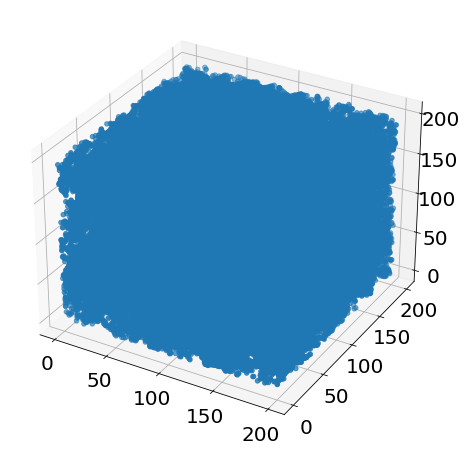

In [5]:
fig = pl.figure(figsize=(8,8))
ax = pl.axes(projection='3d')
ax.scatter3D(points[:,0],points[:,1],points[:,2])

## Bsk

In [6]:
unique_pairs_bsk = Beta_sk(points, 1.0, 300)

 Default cosmology: omegam, w =   0.26000000000000001       -1.0000000000000000     
 Using   cosmology: omegam, w =   0.26000000000000001       0.26000000000000001     
 #####################################
  Settings
   omegam, w =    0.260   0.260
   inputfilename: ./data/pos.tmp
   outputfilename: ../data/posbsk.tmp
   beta =    1.0000000000000000     
   printinfo =  F
   #-NNB searching for BSK:          300
   minimalrcut:   -1.0000000150474662E+030
   maximalrcut:    1.0000000150474662E+030
 #####################################
   (BSK) Begins.
   (BSK) Calculating BSK...
  *** Result wrote to: xdl_beta_skeleton/../data/posbsk.tmp.BSKIndex
 0%==> 1%==> 2%==> 3%==> 4%==> 5%==> 6%==> 7%==> 8%==> 9%==>10%==>11%==>12%==>13%==>14%==>15%==>16%==>17%==>18%==>19%==>20%==>21%==>22%==>23%==>24%==>25%==>26%==>27%==>28%==>29%==>30%==>31%==>32%==>33%==>34%==>35%==>36%==>37%==>38%==>39%==>40%==>41%==>42%==>43%==>44%==>45%==>46%==>47%==>48%==>49%==>50%==>51%==>52%==>53%==>54%==>55%==>56%==>

In [7]:
%%time
ids, n_bsk_connections, id_bsk_connections, dis_bsk_connections, avdis_bsk_connections, id_bsk_firstneigh_connections, n_bsk_firstneigh_connections = topological_features(points, unique_pairs_bsk)

CPU times: user 32min 32s, sys: 332 ms, total: 32min 32s
Wall time: 32min 32s


In [8]:
# fig = pl.figure(figsize=(8,8))
# ax  = pl.axes(projection='3d')
# ax  = plot_3D(ax, points, id_bsk_connections)

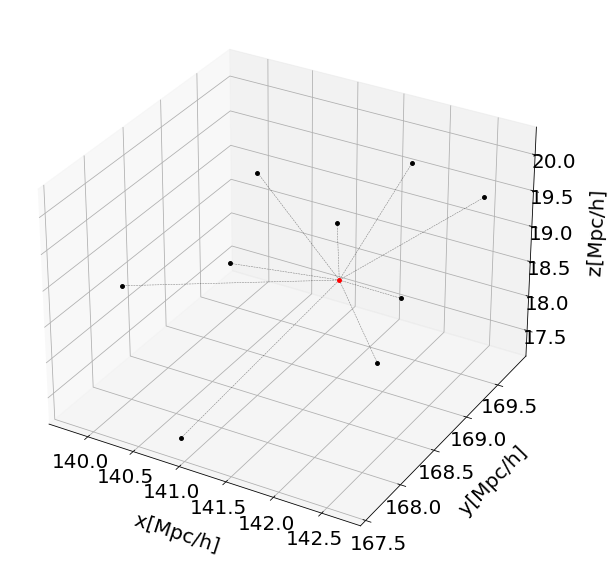

In [25]:
fig = pl.figure(figsize=(8,8))
ax  = pl.axes(projection='3d')
ax  = plot_3D_unique(ax, points, id_bsk_connections, 0)
ax.set_xlabel(' x[Mpc/h]')
ax.set_ylabel(' y[Mpc/h]')
ax.set_zlabel(' z[Mpc/h]')
pl.tight_layout()
pl.show()

Text(0.5, 0, ' z[Mpc/h]')

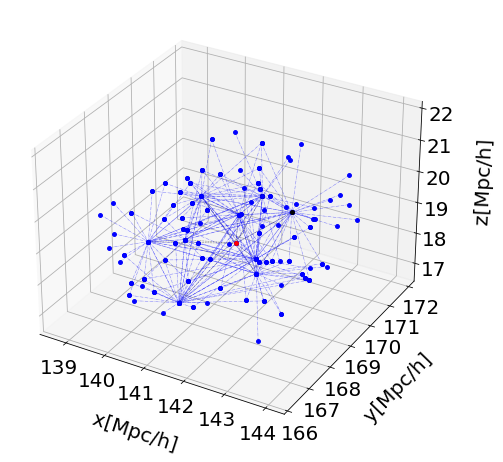

In [22]:
fig = pl.figure(figsize=(8,8))
ax  = pl.axes(projection='3d')
ax  = plot_3D_unique_neighbors(ax,points, id_bsk_connections, id_bsk_firstneigh_connections, 0)
ax.set_xlabel(' x[Mpc/h]')
ax.set_ylabel(' y[Mpc/h]')
ax.set_zlabel(' z[Mpc/h]')

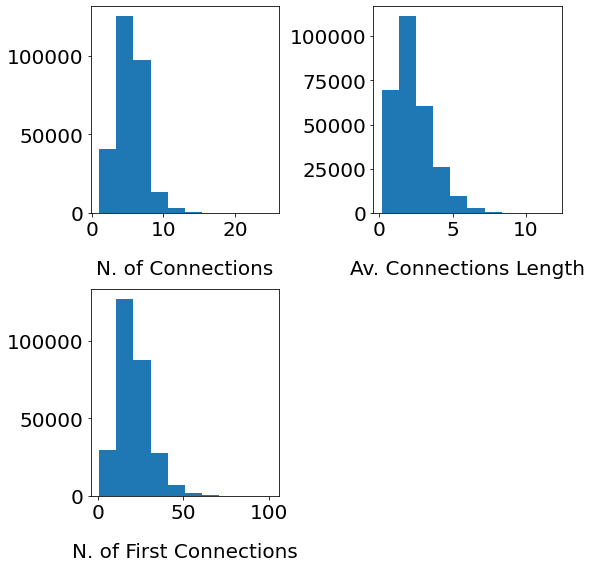

In [11]:
fig = pl.figure(figsize=(8,8))
pl.subplot(2,2,1)
_ = pl.hist(n_bsk_connections)
pl.xlabel('N. of Connections')
pl.subplot(2,2,2)
_ = pl.hist(avdis_bsk_connections)
pl.xlabel('Av. Connections Length')
pl.subplot(2,2,3)
_ = pl.hist(n_bsk_firstneigh_connections)
pl.xlabel('N. of First Connections')
pl.tight_layout()
fig.tight_layout()
pl.show()

## Delaunay

In [12]:
delaunay = Delaunay(points)

In [13]:
all_pairs = []
for simplex in delaunay.simplices:
    a = list(combinations(simplex,2))
    l = list(map(list, a))
    l = list(map(np.sort, l))
    l = list(map(list, l))
    all_pairs.append(l)
all_pairs = np.vstack(all_pairs)
unique_pairs_delaunay = np.unique(all_pairs, axis=0)

In [14]:
%%time
ids, n_delaunay_connections, id_delaunay_connections, dis_delaunay_connections, avdis_delaunay_connections, id_delaunay_firstneigh_connections, n_delaunay_firstneigh_connections = topological_features(points, unique_pairs_delaunay)

CPU times: user 3h 57min 46s, sys: 2.82 s, total: 3h 57min 49s
Wall time: 3h 57min 50s


In [15]:
# fig = pl.figure(figsize=(8,8))
# ax  = pl.axes(projection='3d')
# ax  = plot_3D(ax,points, id_delaunay_connections)

Text(0.5, 0, ' z[Mpc/h]')

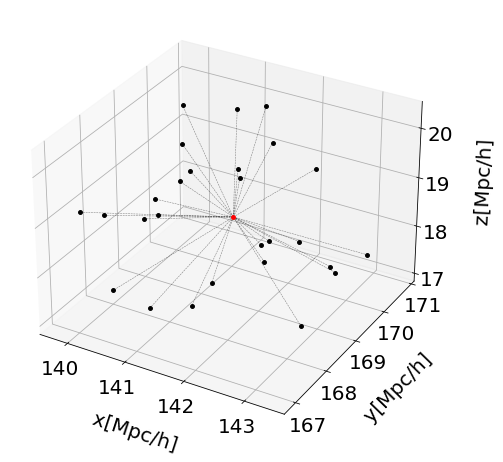

In [23]:
fig = pl.figure(figsize=(8,8))
ax  = pl.axes(projection='3d')
ax  = plot_3D_unique(ax, points, id_delaunay_connections, 0)
ax.set_xlabel(' x[Mpc/h]')
ax.set_ylabel(' y[Mpc/h]')
ax.set_zlabel(' z[Mpc/h]')

Text(0.5, 0, ' z[Mpc/h]')

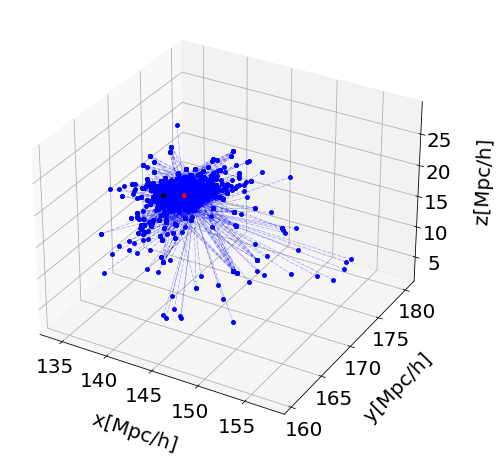

In [24]:
fig = pl.figure(figsize=(8,8))
ax  = pl.axes(projection='3d')
ax  = plot_3D_unique_neighbors(ax,points, id_delaunay_connections, id_delaunay_firstneigh_connections, 0)
ax.set_xlabel(' x[Mpc/h]')
ax.set_ylabel(' y[Mpc/h]')
ax.set_zlabel(' z[Mpc/h]')

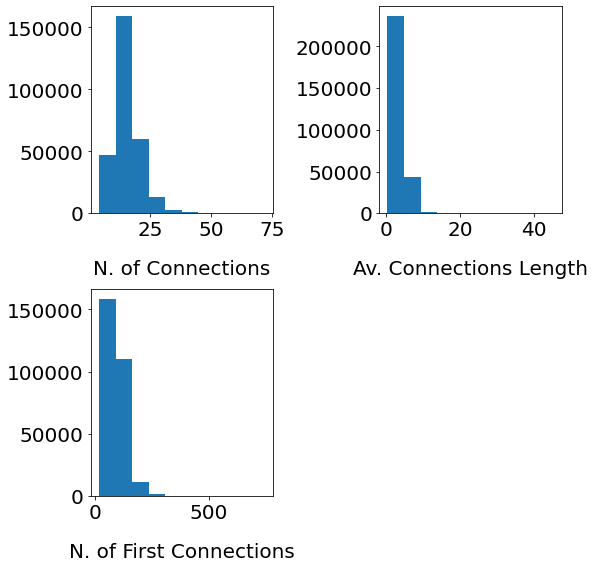

In [18]:
fig = pl.figure(figsize=(8,8))
pl.subplot(2,2,1)
_ = pl.hist(n_delaunay_connections)
pl.xlabel('N. of Connections')
pl.subplot(2,2,2)
_ = pl.hist(avdis_delaunay_connections)
pl.xlabel('Av. Connections Length')
pl.subplot(2,2,3)
_ = pl.hist(n_delaunay_firstneigh_connections)
pl.xlabel('N. of First Connections')
pl.tight_layout()
fig.tight_layout()
pl.show()

In [19]:
df = pd.DataFrame()
df['ID'] = np.array(ids, dtype=int)
df['X'] = points[:,0]
df['Y'] = points[:,1]
df['Z'] = points[:,2]
df['MASS'] = mass
df['ENVIRONMENT'] = np.array(envclass, dtype=int)
df['ID_DELAUNAY_CONNECTIONS']     =  id_delaunay_connections
df['N_DELAUNAY_CONNECTIONS']      =  n_delaunay_connections
df['DIS_DELAUNAY_CONNECTIONS']    =  dis_delaunay_connections
df['AVDIS_DELAUNAY_CONNECTIONS']  =  avdis_delaunay_connections
df['ID_DELAUNAY_FIRSTNEIGH_CONNECTIONS']     =  id_delaunay_firstneigh_connections
df['N_DELAUNAY_FIRSTNEIGH_CONNECTIONS']      =  n_delaunay_firstneigh_connections
df['ID_BSK_CONNECTIONS']      =  id_bsk_connections
df['N_BSK_CONNECTIONS']      =  n_bsk_connections
df['DIS_BSK_CONNECTIONS']    =  dis_bsk_connections
df['AVDIS_BSK_CONNECTIONS']  =  avdis_bsk_connections
df['ID_BSK_FIRSTNEIGH_CONNECTIONS']     =  id_bsk_firstneigh_connections
df['N_BSK_FIRSTNEIGH_CONNECTIONS']      =  n_bsk_firstneigh_connections
df

,ID,X,Y,Z,MASS,ENVIRONMENT,ID_DELAUNAY_CONNECTIONS,N_DELAUNAY_CONNECTIONS,DIS_DELAUNAY_CONNECTIONS,AVDIS_DELAUNAY_CONNECTIONS,ID_DELAUNAY_FIRSTNEIGH_CONNECTIONS,N_DELAUNAY_FIRSTNEIGH_CONNECTIONS,ID_BSK_CONNECTIONS,N_BSK_CONNECTIONS,DIS_BSK_CONNECTIONS,AVDIS_BSK_CONNECTIONS,ID_BSK_FIRSTNEIGH_CONNECTIONS,N_BSK_FIRSTNEIGH_CONNECTIONS
0,0,141.6838,168.7701,18.8034,1.229000e+15,3,"[66449, 105444, 107290, 126162, 126163, 126164...",27.0,"[2.1183345179645303, 2.0592069201515204, 2.278...",1.883103,"[6266, 19188, 26111, 28273, 31865, 36205, 3733...",140.0,"[278349, 154331, 223433, 278346, 278347, 23247...",9.0,"[2.0164154284273685, 2.0468560208280344, 1.095...",1.618422,"[54397, 66449, 83782, 93353, 99029, 105444, 10...",37.0
1,1,45.7796,172.4404,159.1376,1.206000e+15,3,"[21051, 22934, 60168, 84043, 96388, 96389, 117...",23.0,"[1.8157495917664603, 1.5021504618379449, 1.434...",1.557510,"[3824, 10702, 19913, 21051, 22665, 22934, 2885...",119.0,"[195484, 22934, 84043, 147761, 168058, 172813,...",9.0,"[0.7977374317405433, 1.5021504618379449, 1.501...",1.393746,"[21051, 22934, 28855, 37738, 60168, 61790, 840...",43.0
2,2,27.5096,160.0697,140.5773,1.166000e+15,3,"[20428, 72950, 73715, 80748, 96175, 119232, 13...",28.0,"[2.4862575248755014, 2.3695929819274992, 1.578...",1.958377,"[14679, 15909, 17839, 20428, 22925, 34015, 351...",119.0,"[208139, 73715, 279448, 134584, 137453, 243214...",18.0,"[2.000950786501272, 1.5784782861984568, 1.4407...",1.895081,"[15909, 20428, 22925, 35195, 38098, 39083, 421...",71.0
3,3,69.5081,179.9204,182.9516,1.146000e+15,3,"[46630, 50632, 57254, 72351, 107831, 111496, 1...",33.0,"[2.028607603751895, 1.5578706493159005, 2.0697...",1.931863,"[19629, 21014, 25280, 26317, 31014, 31253, 391...",122.0,"[111496, 50632, 57254, 113399, 117545, 132335,...",18.0,"[2.117035656289236, 1.5578706493159005, 2.0697...",1.797297,"[19629, 39126, 46630, 50632, 57254, 57255, 716...",58.0
4,4,181.7817,67.3265,165.4047,1.086000e+15,3,"[47942, 61323, 74805, 91228, 98143, 115648, 13...",31.0,"[1.7112861888065363, 1.6736512002206252, 1.971...",1.834136,"[12929, 13442, 24327, 24328, 28647, 29326, 311...",108.0,"[115648, 184345, 270205, 178821, 270202, 20335...",17.0,"[1.4205141146782065, 2.005774364179577, 1.8538...",1.774007,"[24327, 24328, 31138, 42493, 46973, 47942, 597...",56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281460,281460,34.4582,183.0479,105.7716,1.016000e+11,2,"[476, 46011, 50608, 59648, 121929, 135003, 147...",13.0,"[1.1253287253065096, 0.6004205692679014, 0.671...",0.999531,"[476, 5983, 13029, 18790, 29887, 31614, 46011,...",48.0,"[476, 46011, 50608, 59648, 189279, 281462]",6.0,"[1.1253287253065096, 0.6004205692679014, 0.671...",0.808971,"[476, 31614, 46011, 50608, 59648, 81913, 12192...",19.0
281461,281461,34.0601,182.2075,106.4457,1.016000e+11,3,"[476, 46011, 50608, 81913, 129413, 147755, 177...",12.0,"[0.7293173931835126, 1.1173915786330093, 0.962...",0.982462,"[476, 18790, 29887, 46011, 46571, 50164, 50608...",47.0,"[476, 46011, 147755, 202129, 202131]",5.0,"[0.7293173931835126, 1.1173915786330093, 0.545...",0.798545,"[476, 46011, 50608, 81913, 126376, 129413, 135...",14.0
281462,281462,34.7056,183.9671,105.3986,1.016000e+11,2,"[13029, 31614, 46011, 59648, 121929, 126376, 1...",12.0,"[2.22688990747186, 1.8035500824762374, 1.19991...",1.537800,"[476, 5983, 6941, 13029, 15635, 18790, 20527, ...",80.0,"[31614, 59648, 121929, 126376, 281460]",5.0,"[1.8035500824762374, 0.8348310248187816, 0.408...",1.164568,"[476, 5983, 20527, 31614, 46011, 50164, 50608,...",22.0
281463,281463,34.4005,185.3278,103.5761,1.016000e+11,2,"[6941, 13029, 56402, 99348, 104132, 132789, 13...",11.0,"[0.7028655063381608, 1.6603625296904274, 1.319...",1.652322,"[6941, 8413, 13029, 18410, 28655, 31614, 42927...",53.0,"[6941, 56402, 99348, 104132, 138628, 184643, 2...",7.0,"[0.7028655063381608, 1.319993068163629, 0.7277...",1.262816,"[6941, 13029, 18410, 56402, 99348, 101222, 104...",22.0


In [20]:
df.to_pickle('./data/TCW_topological_dataset.pkl')